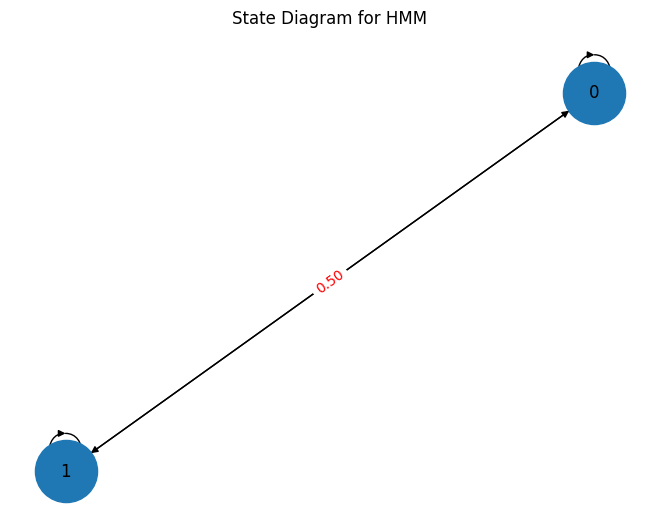

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx  
from hmmlearn import hmm

# Define the state space
states = ["CP", "IP"]
n_states = len(states)

# Define the observation space
observations = ["cola", "ice_t", "lem"]
n_observations = len(observations)

# Define the initial state distribution
start_probability = np.array([1.0,0.0]) # always start from CP

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
                                    [0.5, 0.5]])

# Define the observation likelihoods
emission_probability = np.array([[0.6, 0.1, 0.3],
                                [0.1, 0.7, 0.2]])

# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

'''

# Define the sequence of observations
observations_sequence = np.array([2, 1, 0]).reshape(-1, 1)

# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

'''

# Plot the state transition diagram
G = nx.DiGraph()

# Add nodes
for i, state in enumerate(states):
    G.add_node(i, label=state)

# Add edges with labels
for i in range(n_states):
    for j in range(n_states):
        if transition_probability[i, j] > 0:
            G.add_edge(i, j, weight=transition_probability[i, j], label=f"{transition_probability[i, j]:.2f}")
            
# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=12, arrows=True)

# Add edge labels
edge_labels = {(source, target): f"{G[source][target]['weight']:.2f}" for source, target in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show plot
plt.title("State Diagram for HMM")
plt.show()


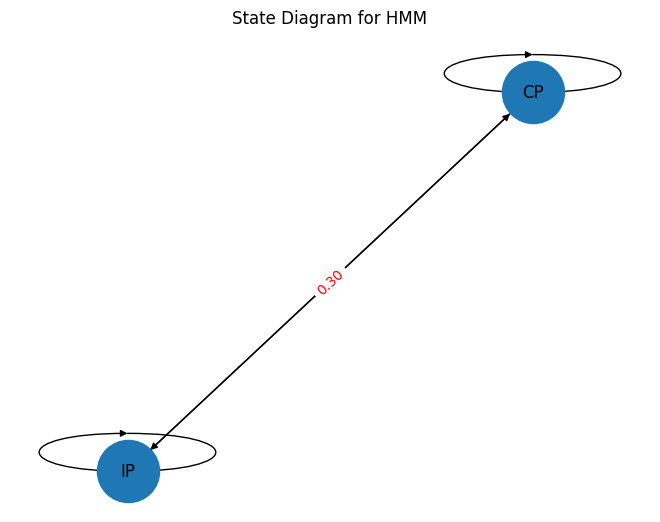

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from hmmlearn import hmm

# Define the state space
states = ["CP", "IP"]
n_states = len(states)

# Define the observation space
observations = ["cola", "ice_t", "lem"]
n_observations = len(observations)

# Define the initial state distribution
start_probability = np.array([1.0, 0.0])  # always start from CP

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
                                   [0.5, 0.5]])

# Define the observation likelihoods
emission_probability = np.array([[0.6, 0.1, 0.3],
                                 [0.1, 0.7, 0.2]])

# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Plot the state transition diagram
G = nx.DiGraph()

# Add nodes
for i, state in enumerate(states):
    G.add_node(state)

# Add forward edges with labels
for i in range(n_states):
    for j in range(n_states):
        if transition_probability[i, j] > 0:
            G.add_edge(states[i], states[j], weight=transition_probability[i, j], label=f"{transition_probability[i, j]:.2f}")

# Add backward edges with labels
for j in range(n_states):
    for i in range(n_states):
        if transition_probability[i, j] > 0:
            G.add_edge(states[j], states[i], weight=transition_probability[i, j], label=f"{transition_probability[i, j]:.2f}")

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=12, arrows=True)

# Add edge labels
edge_labels = {(source, target): data['label'] for source, target, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show plot
plt.title("State Diagram for HMM")
plt.show()


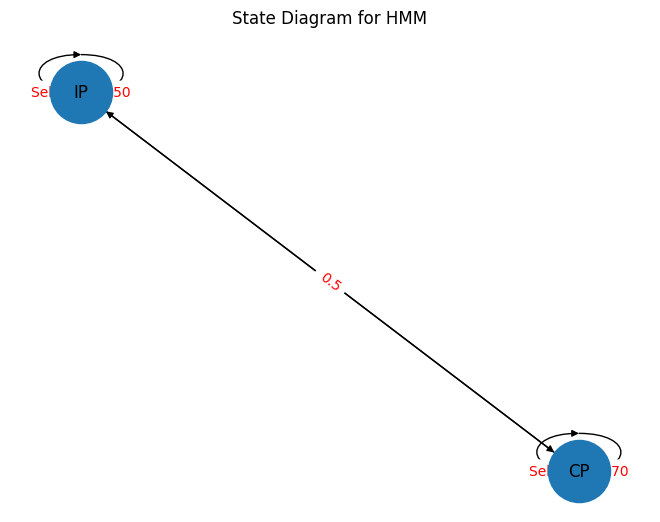

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from hmmlearn import hmm

# Define the state space
states = ["CP", "IP"]
n_states = len(states)

# Define the initial state distribution
start_probability = np.array([1.0, 0.0])  # always start from CP

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
                                   [0.5, 0.5]])

# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability

# Plot the state transition diagram
G = nx.DiGraph()

# Add nodes
for i, state in enumerate(states):
    G.add_node(state)

# Add edges with labels
for i in range(n_states):
    for j in range(n_states):
        if transition_probability[i, j] > 0:
            if i == j:  # Check for self-loops
                G.add_edge(states[i], states[j], weight=transition_probability[i, j], label=f"Self-loop: {transition_probability[i, j]:.2f}")
            else:
                G.add_edge(states[i], states[j], weight=transition_probability[i, j], label=f"{transition_probability[i, j]:.2f}")

# Add edges between "CP" and "IP" with appropriate labels
G.add_edge("CP", "IP", weight=0.3, label=" 0.3")
G.add_edge("IP", "CP", weight=0.5, label="0.5")

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=12, arrows=True)

# Add edge labels
edge_labels = {(source, target): data['label'] for source, target, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show plot
plt.title("State Diagram for HMM")
plt.show()
